# Neural Networks Machine Learning Experimentation

In [1]:
import torch
import constants
import torchvision
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import transforms
from utils import EarlyStopper, DataAugmentor, Trainer
from models import SimplifiedVisionTransformer, VisionTransformer, VisionTransformerDepth
from torch.utils.data import DataLoader, random_split
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Training models on unprocessed dataset

### Prepare the dataset

In [24]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_train_dataset = DataAugmentor.FashionMNIST(root="./data", train=True, download=True, transform=transform, augmentation="none")
test_dataset = DataAugmentor.FashionMNIST(root="./data", train=False, download=True, transform=transform, augmentation="none")
train_size = int(constants.TRAIN_VAL_SPLIT * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=constants.BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)

### Training Base Vision Transformer Architecture

In [54]:
model = VisionTransformer(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 54,858


In [ ]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

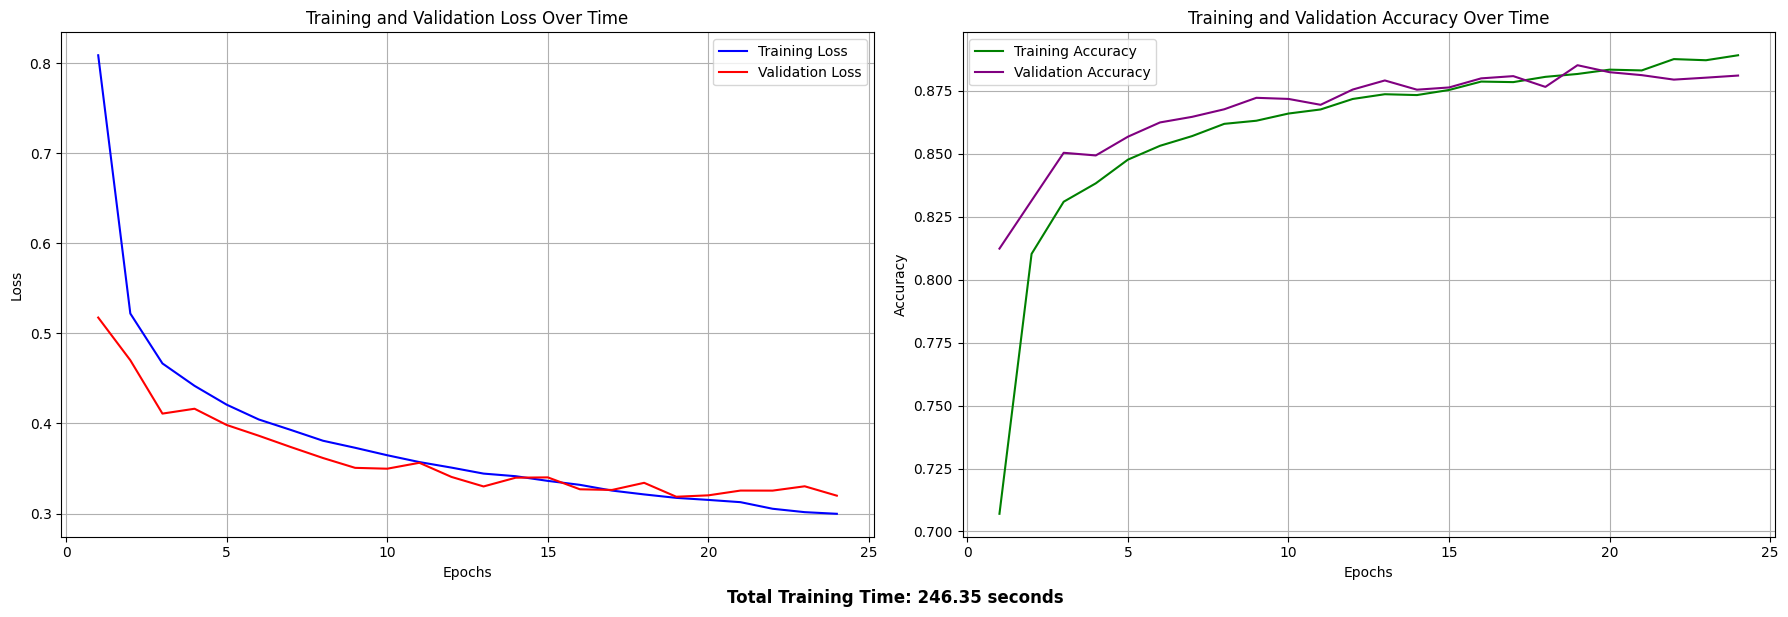

In [5]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [6]:
# Test and save the model
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/none", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/none/VisionTransformer_0.8704.safetensor.safetensor
Config file saved: safetensors/none/VisionTransformer_0.8704.safetensor_config.json
0.8704


### Training Modified Vision Transformer

In [7]:
model = SimplifiedVisionTransformer(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  image_height=28,
  image_width=28,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

In [8]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

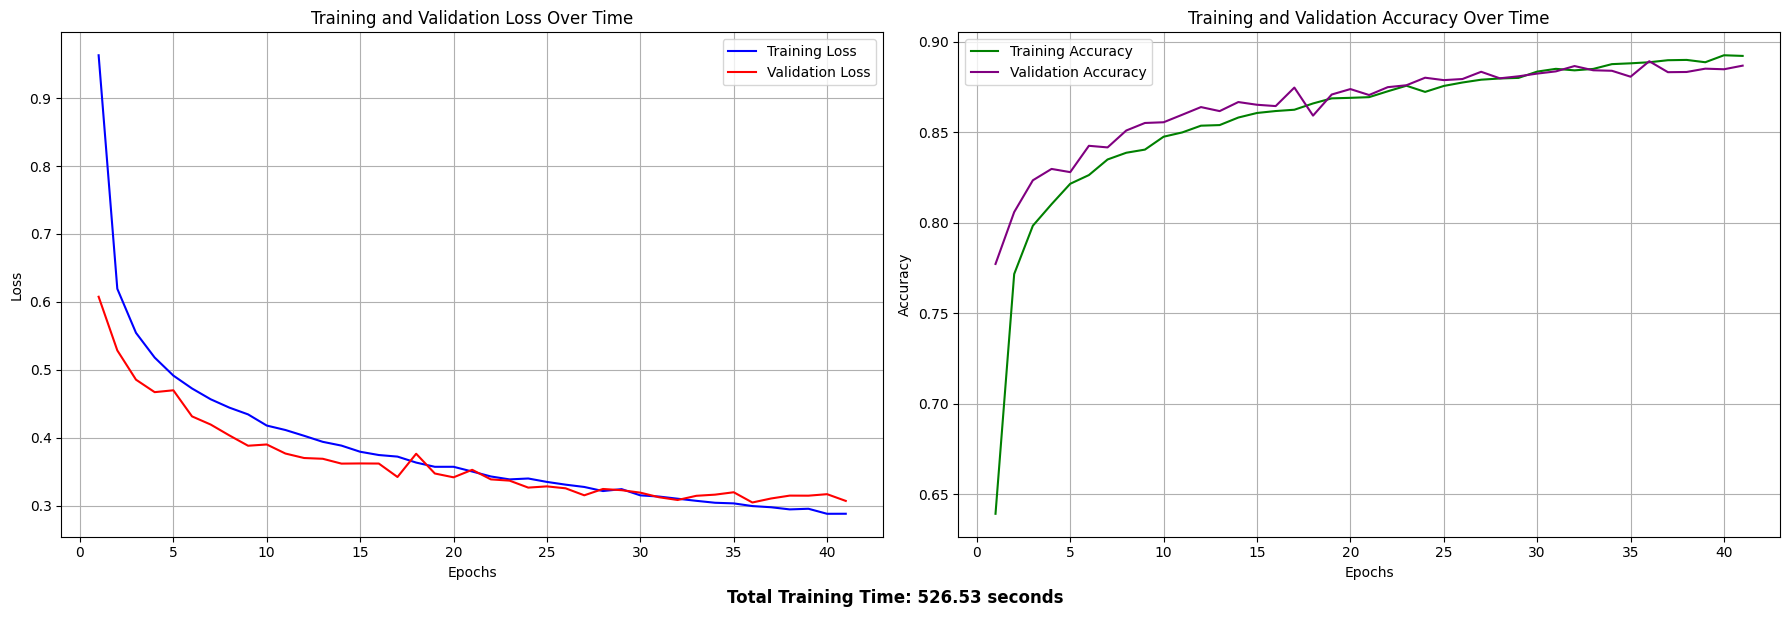

In [9]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [10]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/none", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/none/SimplifiedVisionTransformer_0.8794.safetensor.safetensor
Config file saved: safetensors/none/SimplifiedVisionTransformer_0.8794.safetensor_config.json
0.8794


### Training Depth Convolutional Vision Transformer

In [11]:
model = VisionTransformerDepth(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

In [12]:
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

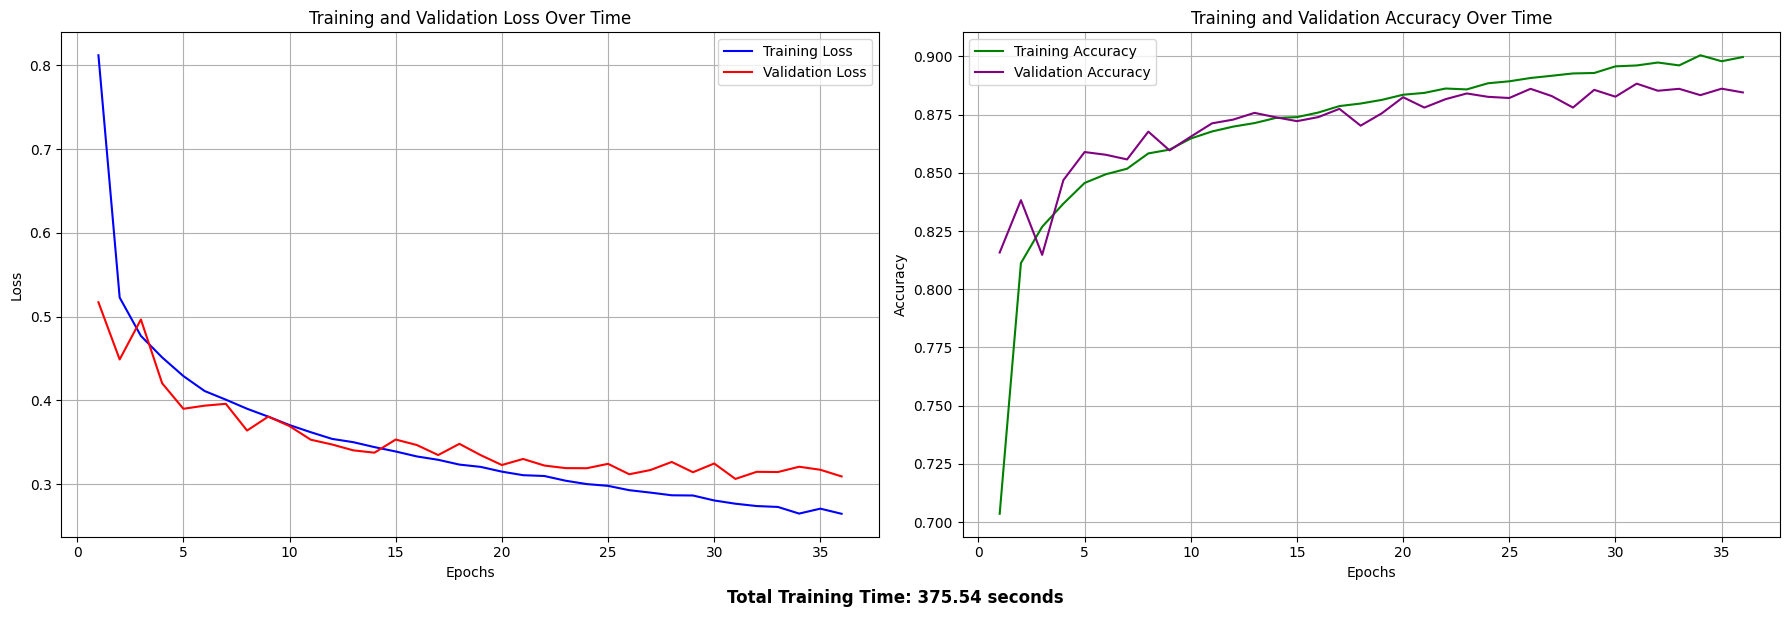

In [13]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [14]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/none", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/none/VisionTransformerDepth_0.8760.safetensor.safetensor
Config file saved: safetensors/none/VisionTransformerDepth_0.8760.safetensor_config.json
0.876


## Training models on RandAug + MixUp

### Prepare dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_train_dataset = DataAugmentor.FashionMNIST(root="./data", train=True, download=True, transform=transform, augmentation="all")
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
train_size = int(constants.TRAIN_VAL_SPLIT * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=constants.BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)

### Train Base Vision Transformer

In [36]:
model = VisionTransformer(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 54,858


In [19]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

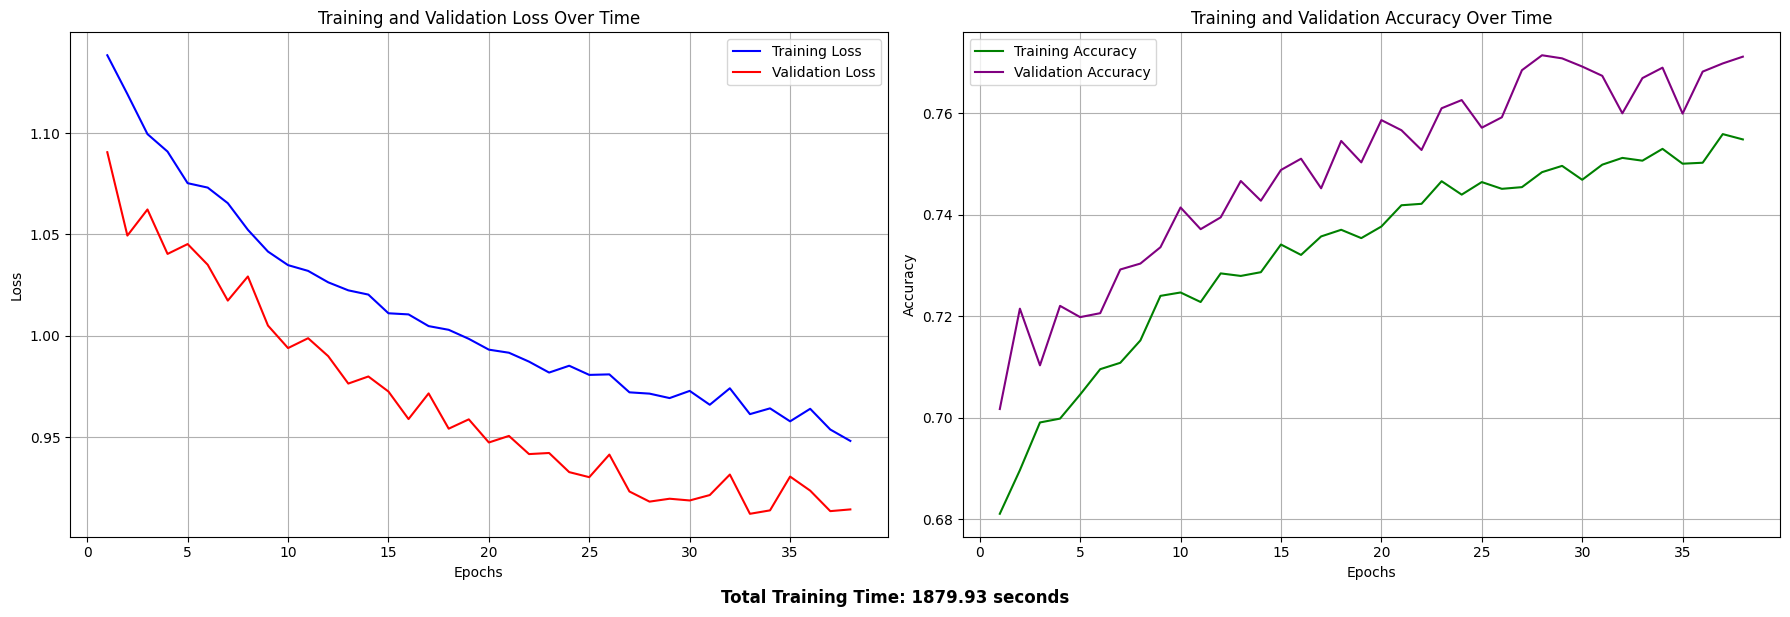

In [20]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [21]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformer_0.8303.safetensor.safetensor
Config file saved: safetensors/all/VisionTransformer_0.8303.safetensor_config.json
0.8303


### Train Depthwise Convolutional Vision Transformer

In [35]:
model = VisionTransformerDepth(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 55,562


In [23]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

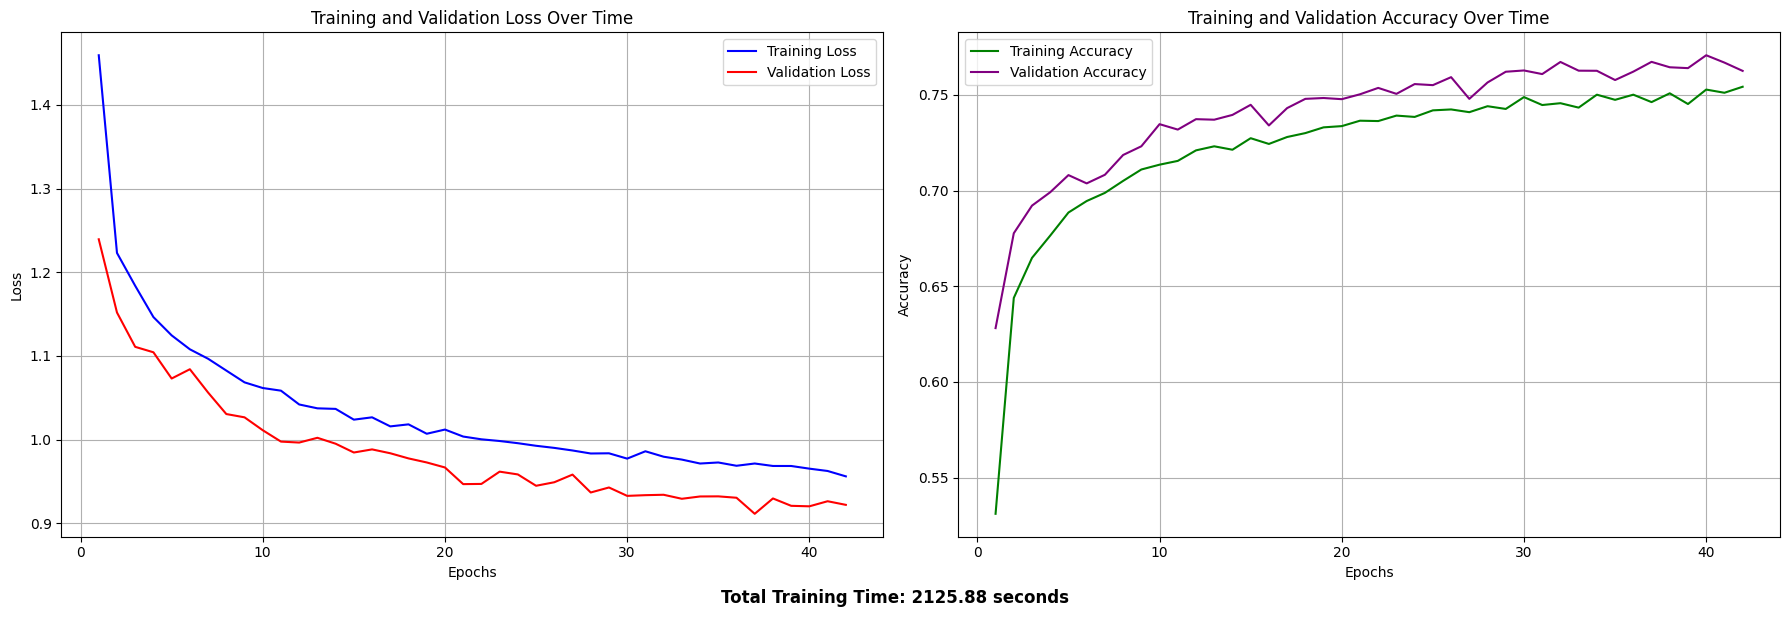

In [24]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [25]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformerDepth_0.8191.safetensor.safetensor
Config file saved: safetensors/all/VisionTransformerDepth_0.8191.safetensor_config.json
0.8191


### Vision Transformer (+3 transformer layers)

In [38]:
model = VisionTransformer(
	in_channels=1,
	hidden_channels=constants.HIDDEN_CHANNELS,
	out_channels=10,
	num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS + 3,
	num_heads=constants.NUM_HEADS,
	mlp_ratio=constants.MLP_RATIO,
	dropout=constants.DROPOUT,
	patch_size=7,
	image_height=28,
	image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 204,810
Model device: cuda:0


In [ ]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

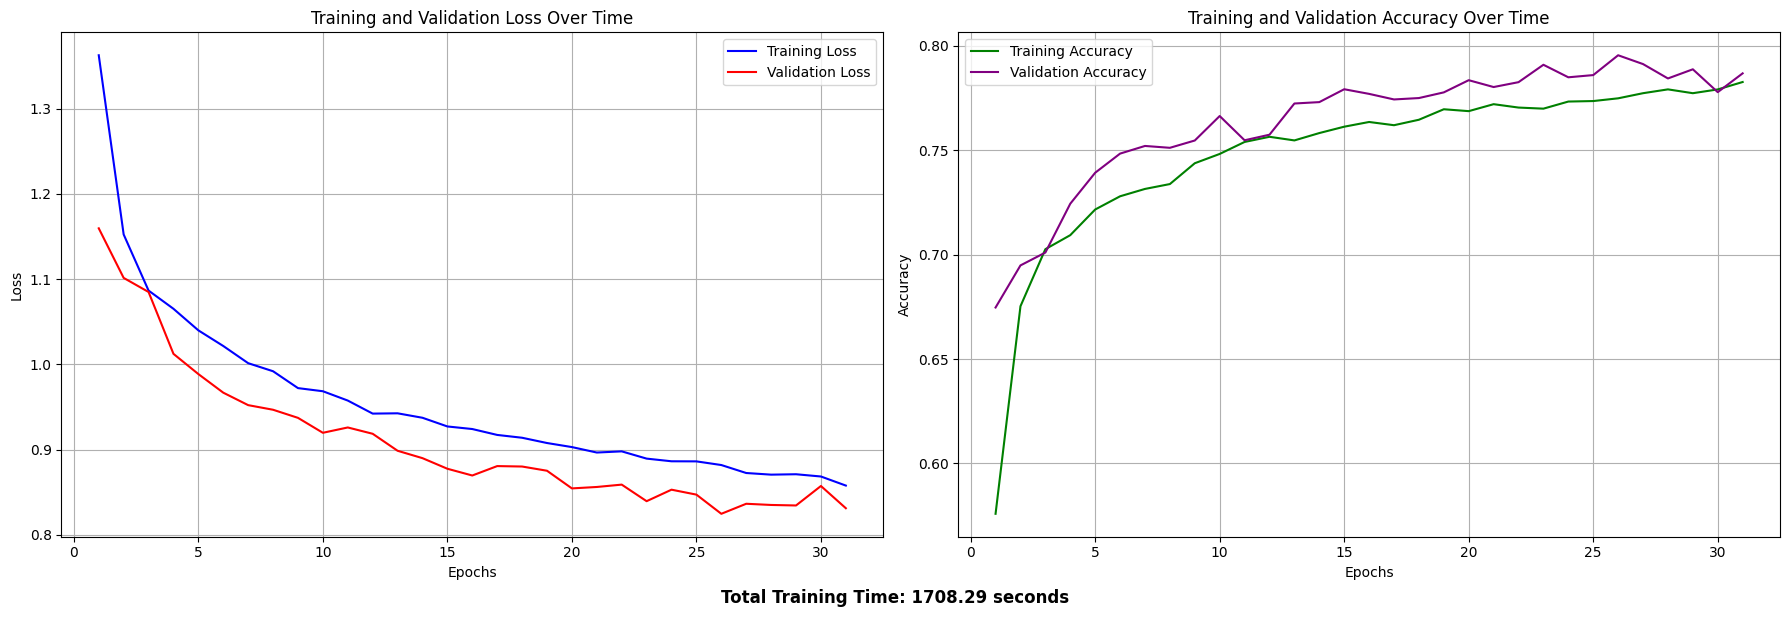

In [28]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [29]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformer_0.8472.safetensor.safetensor
Config file saved: safetensors/all/VisionTransformer_0.8472.safetensor_config.json
0.8472


### Depthwise Vision Transformer (+3 transformer layers)

In [7]:
model = VisionTransformerDepth(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS + 3,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

# Print model parameter count
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 340,874


In [8]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

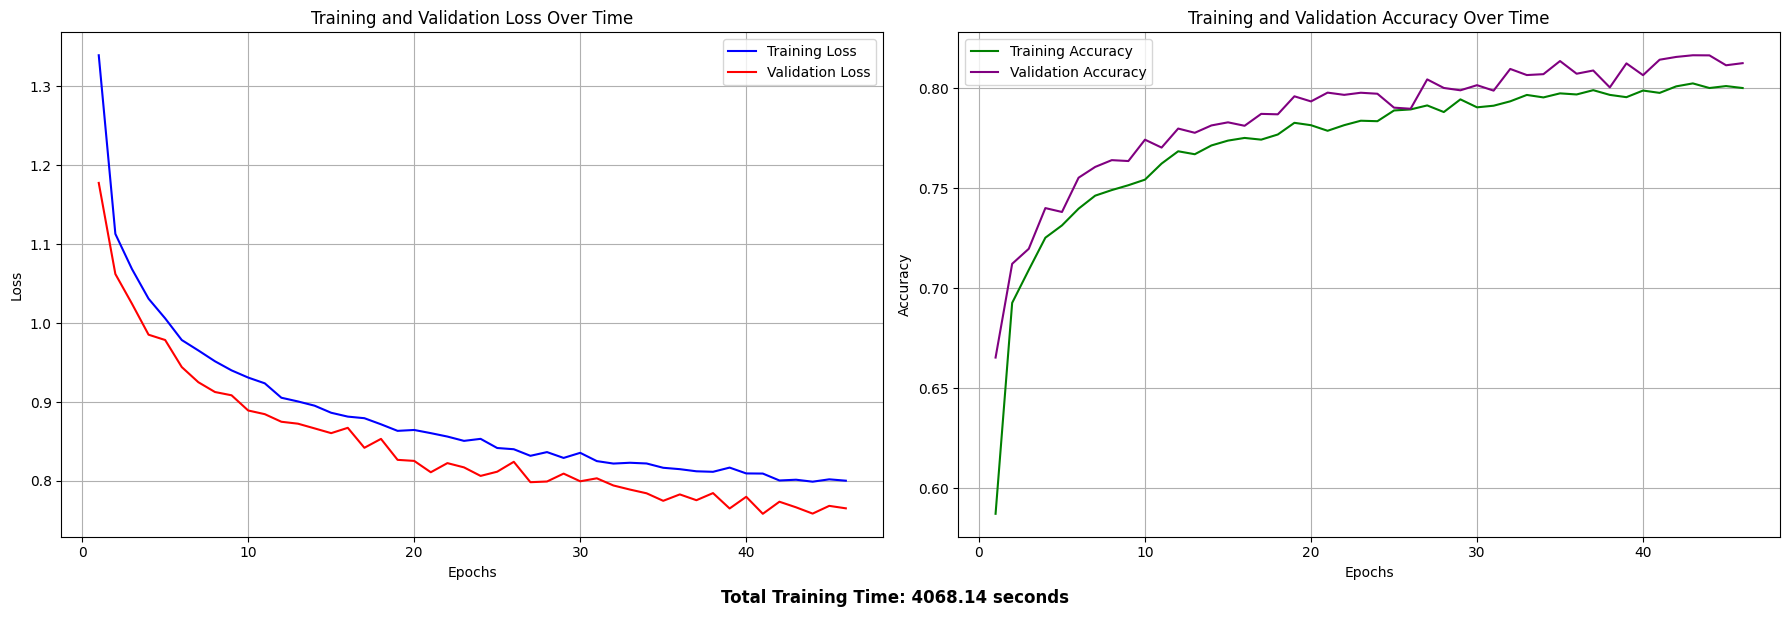

In [9]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [10]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformerDepth_0.8708.safetensor
Config file saved: safetensors/all/VisionTransformerDepth_0.8708_config.json
0.8708


### Vision Transformer (+3 transformer layers, +2 mlp ratio)

In [4]:
model = VisionTransformer(
	in_channels=1,
	hidden_channels=constants.HIDDEN_CHANNELS,
	out_channels=10,
	num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS + 3,
	num_heads=constants.NUM_HEADS,
	mlp_ratio=constants.MLP_RATIO + 2, # 4 + 2
	dropout=constants.DROPOUT,
	patch_size=7,
	image_height=28,
	image_width=28,
).to(device)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0)

Total parameters: 419,914


In [5]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

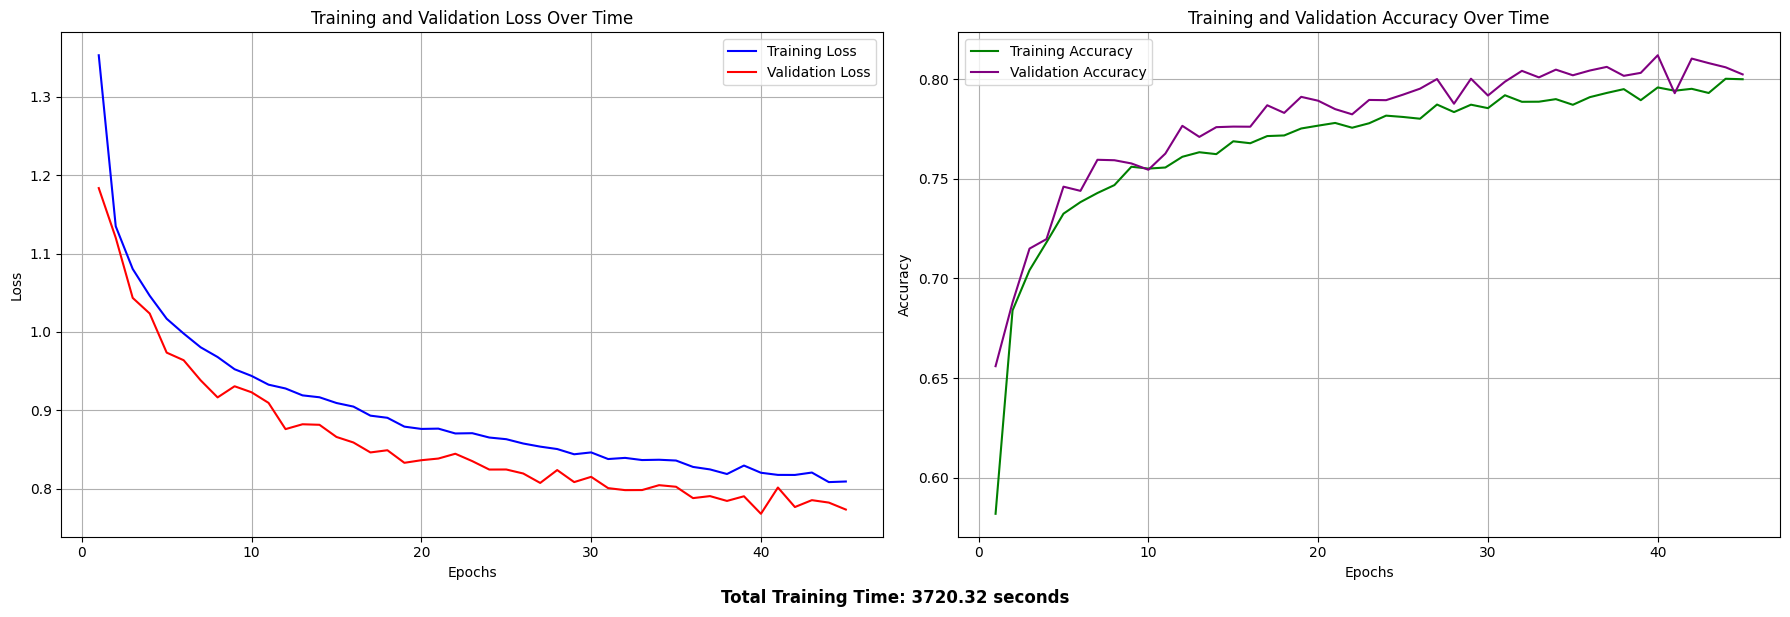

In [6]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [7]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformer_0.8634.safetensor
Config file saved: safetensors/all/VisionTransformer_0.8634_config.json
0.8634


### Depthwise Vision Transformer (+3 transformer layers, +2 mlp ratio)

In [8]:
model = VisionTransformerDepth(
  in_channels=1,
  hidden_channels=constants.HIDDEN_CHANNELS,
  out_channels=10,
  num_transformer_layers=constants.NUM_TRANSFORMER_LAYERS + 3,
  num_heads=constants.NUM_HEADS,
  mlp_ratio=constants.MLP_RATIO + 2,
  dropout=constants.DROPOUT,
  patch_size=7,
  image_height=28,
  image_width=28,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())

In [9]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

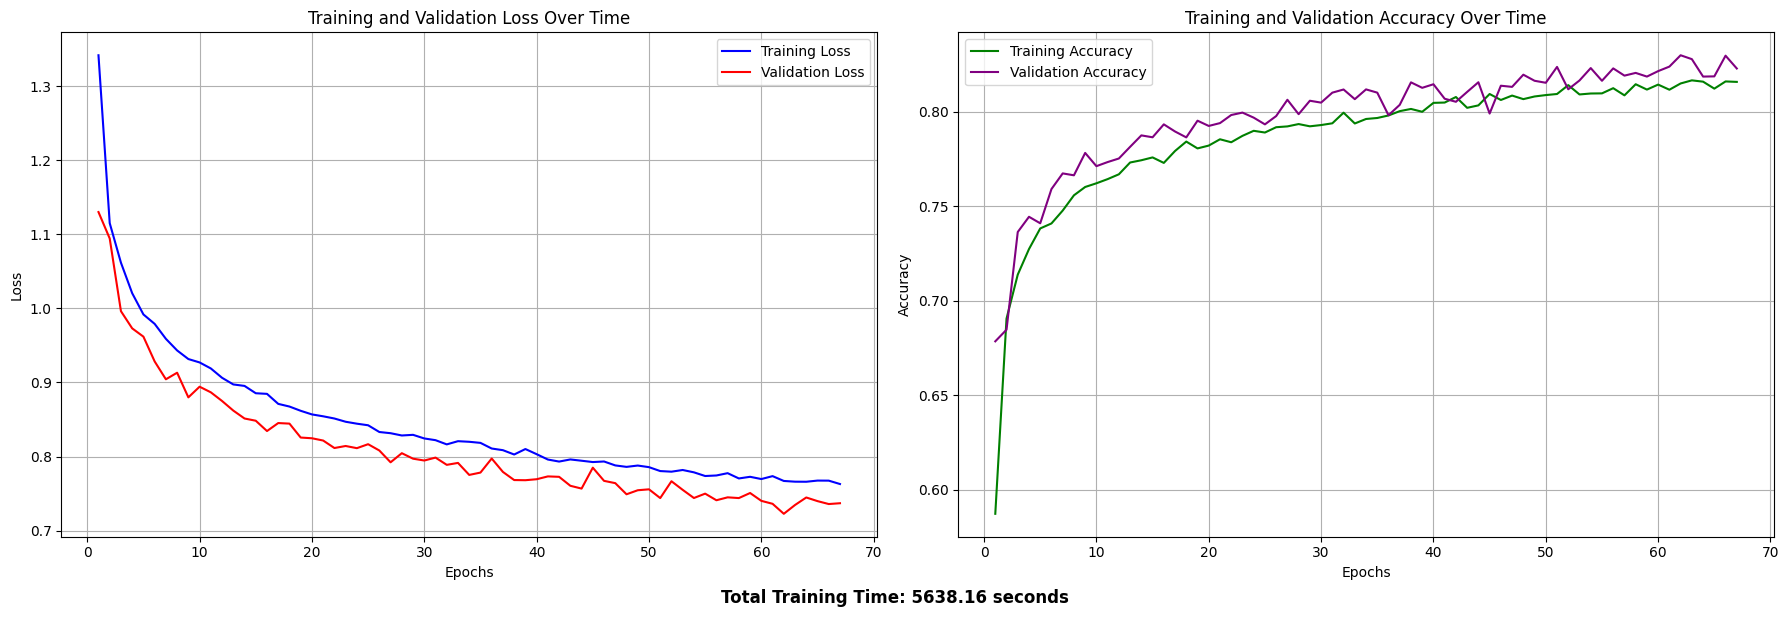

In [10]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [11]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VisionTransformerDepth_0.8793.safetensor
Config file saved: safetensors/all/VisionTransformerDepth_0.8793_config.json
0.8793


## Running other models.

In [2]:
from models import VGG8, VGG6, ResNet18

In [13]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_train_dataset = DataAugmentor.FashionMNIST(root="./data", train=True, download=True, transform=transform, augmentation="none")
test_dataset = DataAugmentor.FashionMNIST(root="./data", train=False, download=True, transform=transform, augmentation="none")
train_size = int(constants.TRAIN_VAL_SPLIT * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=constants.BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)

### VGG8

In [14]:
model = VGG8().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 1,692,778


In [15]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

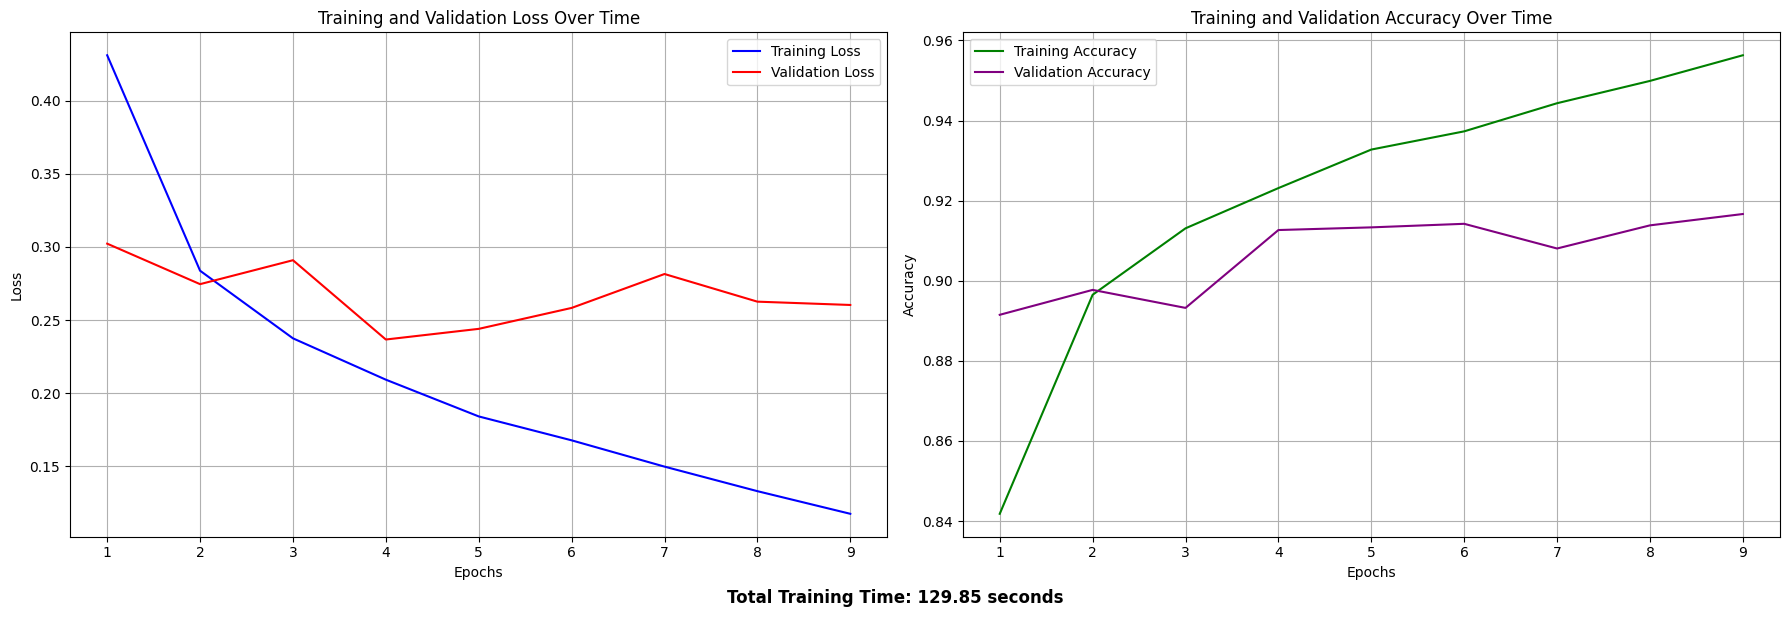

In [16]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [17]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VGG8_0.9134.safetensor
Config file saved: safetensors/all/VGG8_0.9134_config.json
0.9134


### VGG6

In [18]:
model = VGG6().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 1,686,410


In [19]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

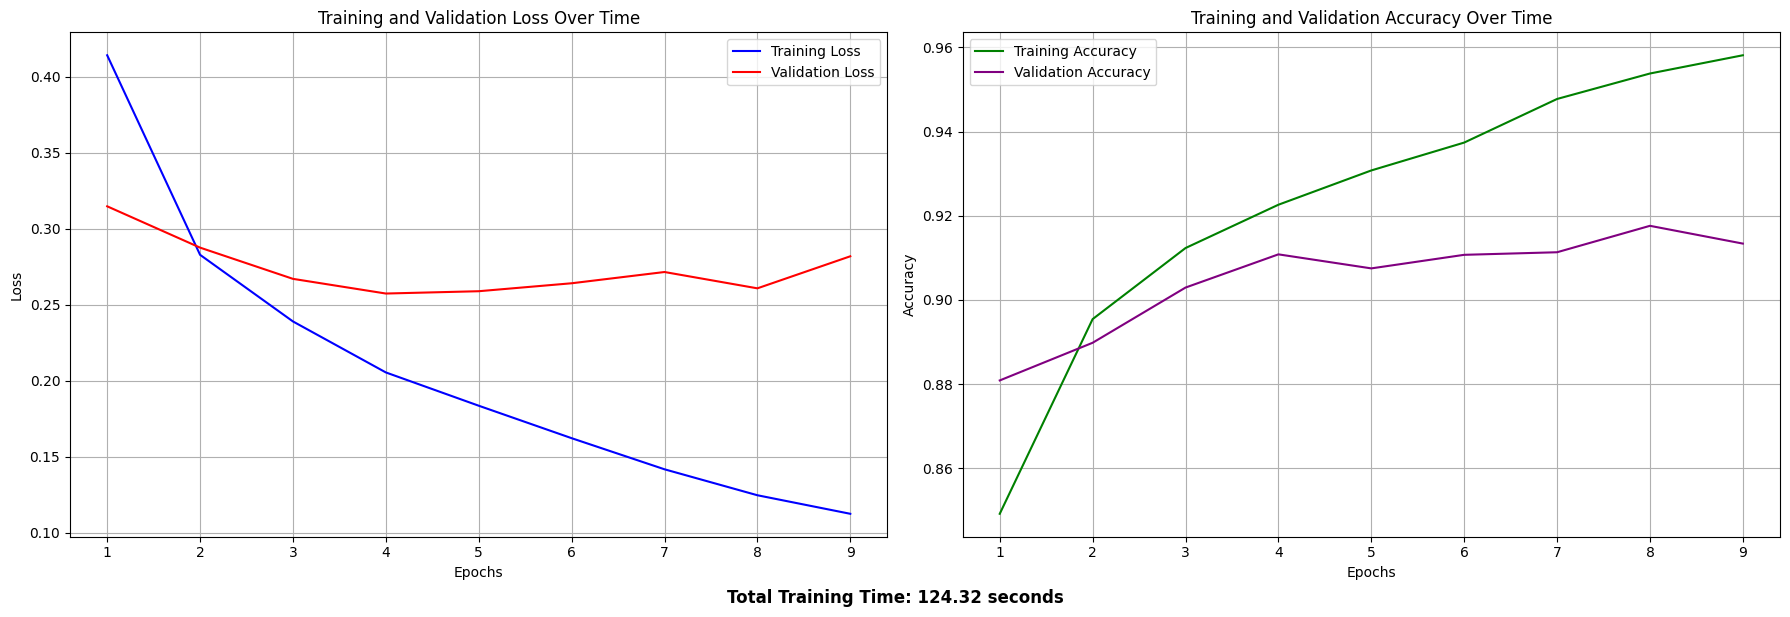

In [20]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [21]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VGG6_0.9103.safetensor
Config file saved: safetensors/all/VGG6_0.9103_config.json
0.9103


### Resnet 18

In [22]:
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 13,101,194


In [23]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

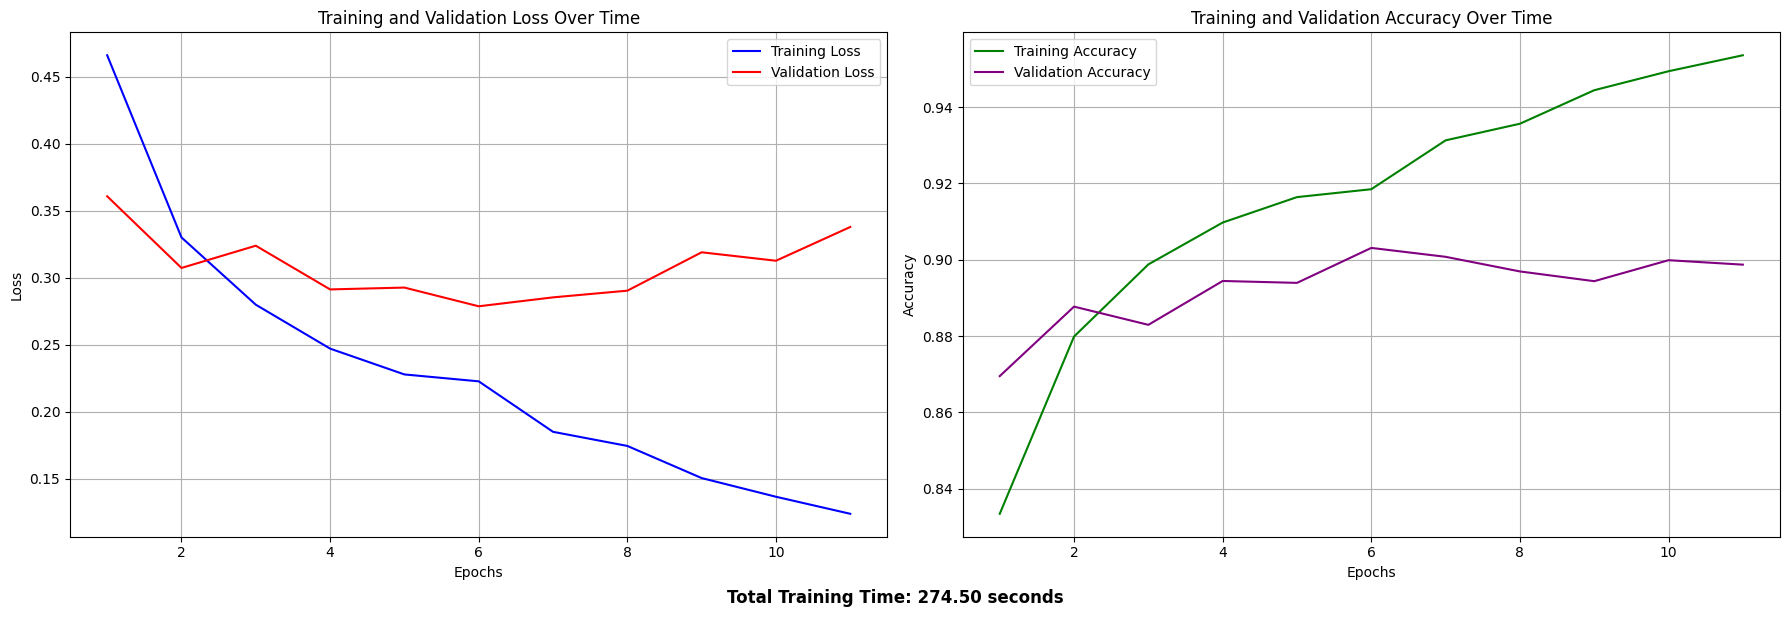

In [24]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [25]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/ResNet18_0.8965.safetensor
Config file saved: safetensors/all/ResNet18_0.8965_config.json
0.8965


### RandAug + MixUp

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
full_train_dataset = DataAugmentor.FashionMNIST(root="./data", train=True, download=True, transform=transform, augmentation="all")
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)
train_size = int(constants.TRAIN_VAL_SPLIT * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])
train_dataloader = DataLoader(train_dataset, batch_size=constants.BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=constants.BATCH_SIZE, shuffle=False)

### VGG8

In [4]:
model = VGG8().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 1,692,778


In [5]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

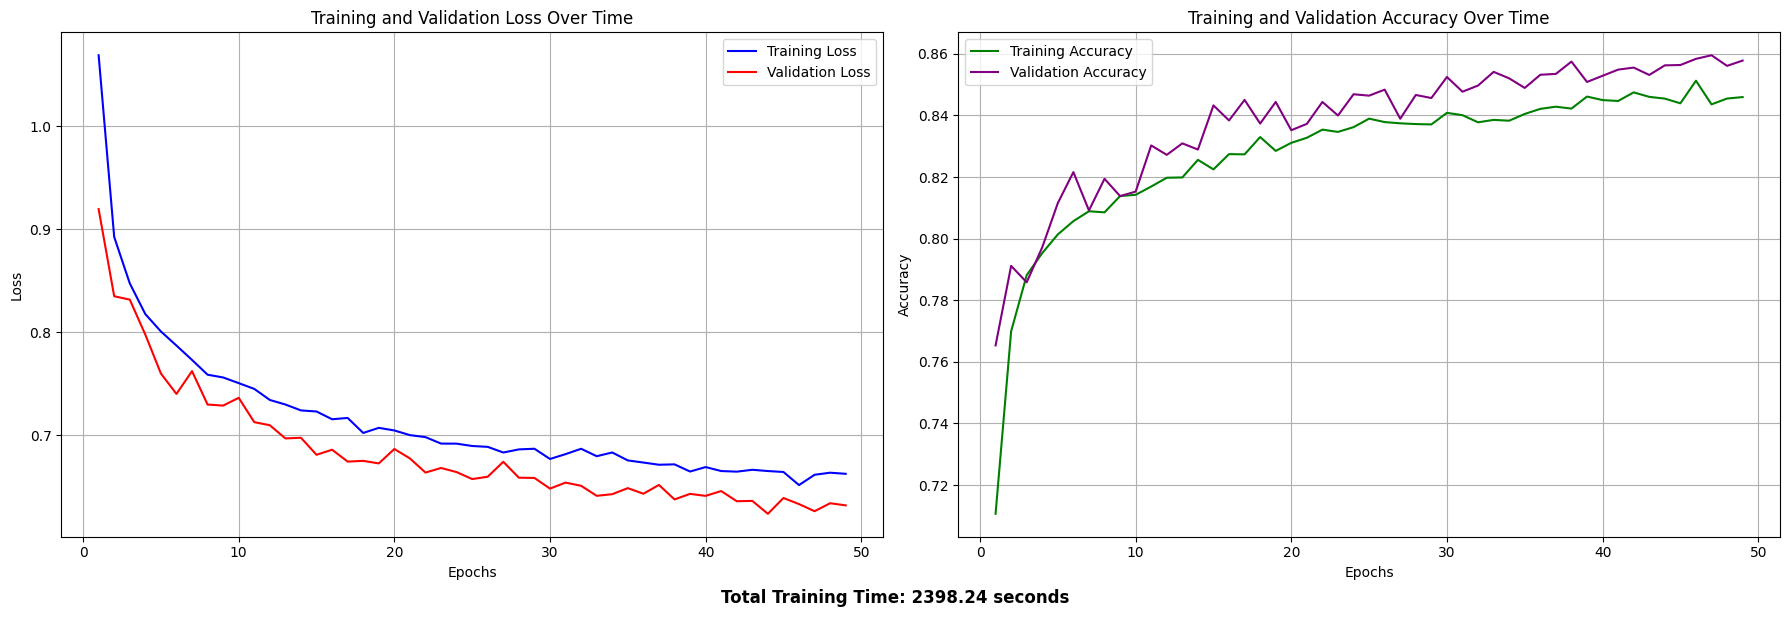

In [6]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [7]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VGG8_0.9178.safetensor
Config file saved: safetensors/all/VGG8_0.9178_config.json
0.9178


### VGG6

In [8]:
model = VGG6().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 1,686,410


In [9]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

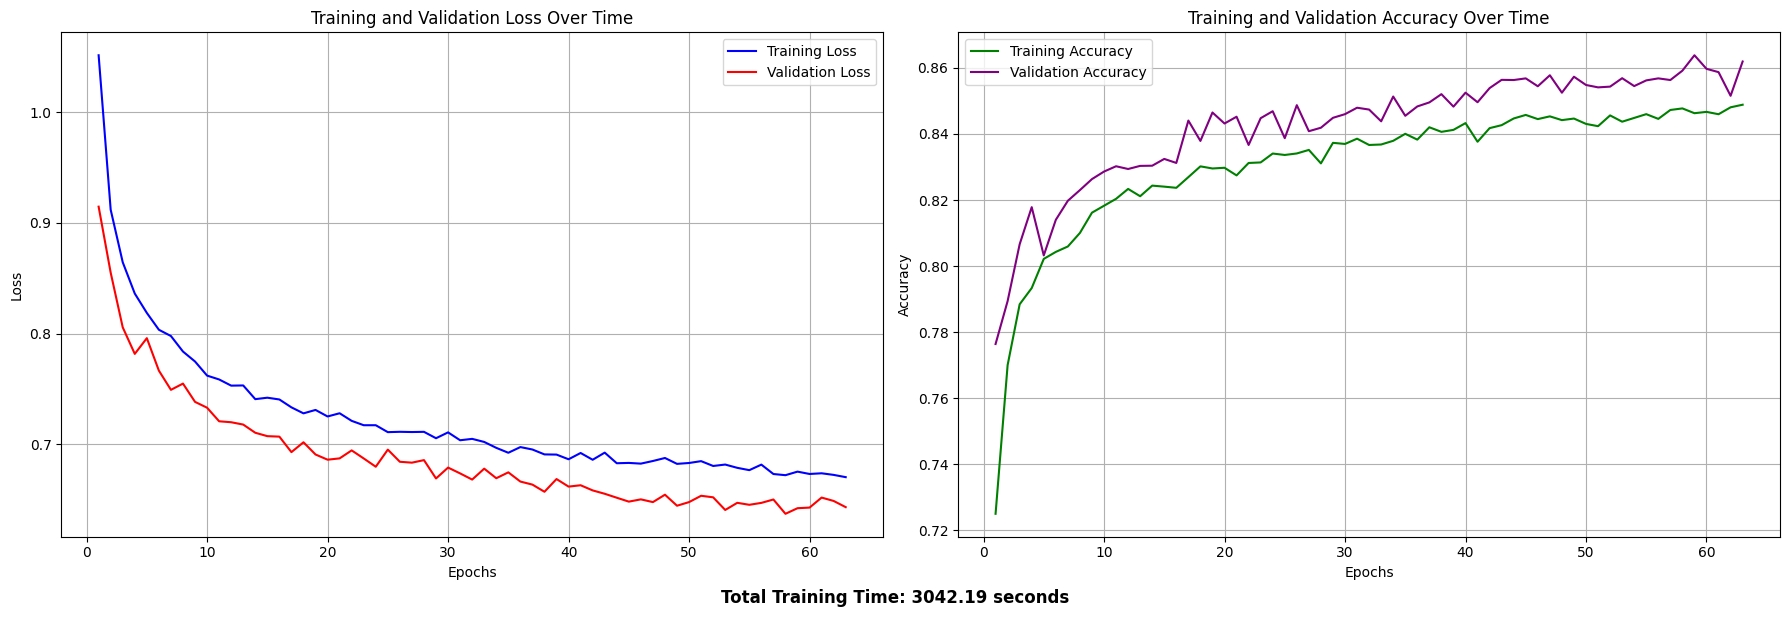

In [10]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [11]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/VGG6_0.9107.safetensor
Config file saved: safetensors/all/VGG6_0.9107_config.json
0.9107


### ResNet18

In [12]:
model = ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=constants.LEARNING_RATE)
early_stopper = EarlyStopper(patience=constants.PATIENCE, min_delta=0.001)
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params:,}")

Total parameters: 13,101,194


In [13]:
# Initialize trainer and train the model
trainer = Trainer(model, criterion, optimizer, early_stopper, device, verbose=False)
train_losses, val_losses, train_accuracies, val_accuracies, training_time = trainer.train(train_dataloader, val_dataloader, num_epochs=constants.NUM_EPOCHS)

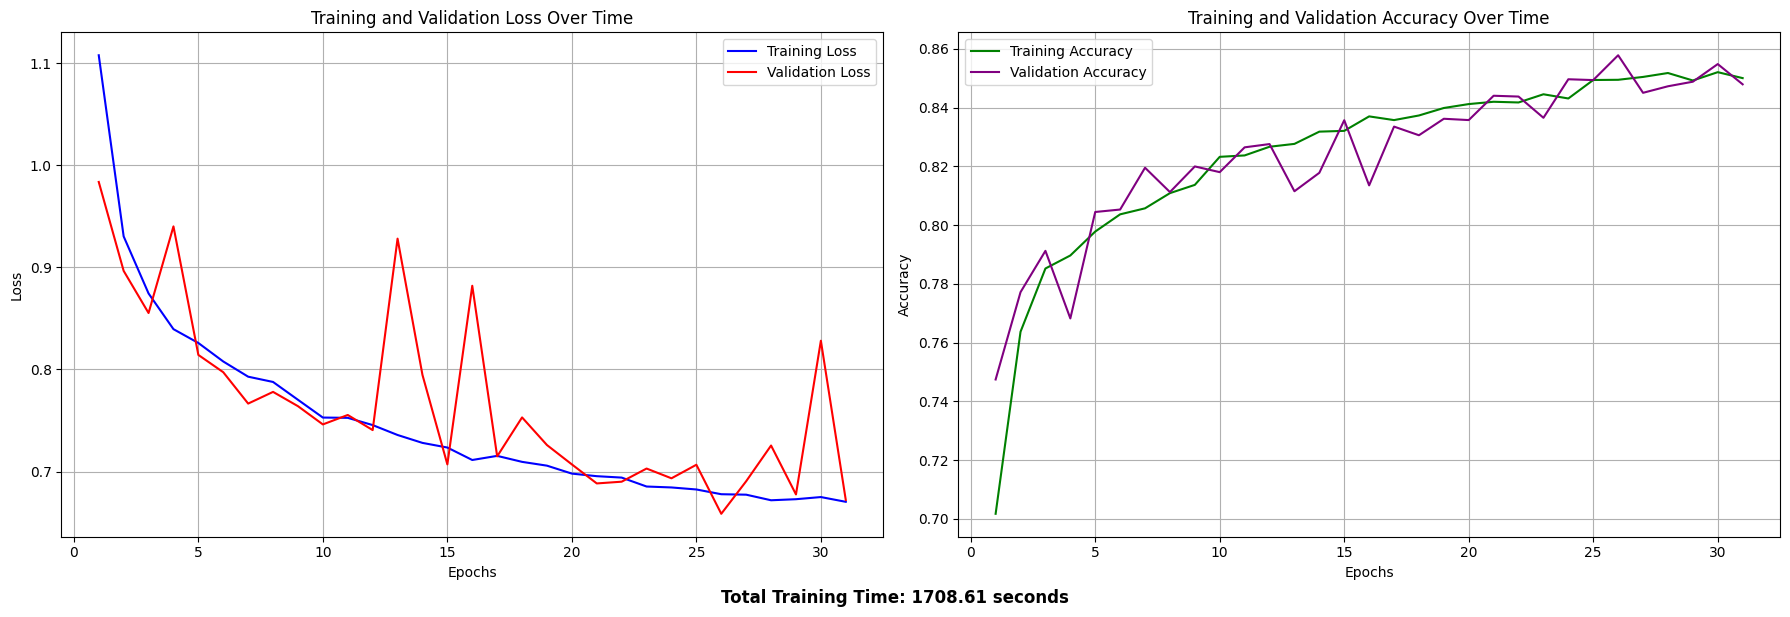

In [14]:
# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot losses on first subplot
ax1.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue')
ax1.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss Over Time')
ax1.legend()
ax1.grid(True)

# Plot accuracies on second subplot
ax2.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy', color='green')
ax2.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy', color='purple')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy Over Time')
ax2.legend()
ax2.grid(True)

time_string = f"Total Training Time: {training_time:.2f} seconds"
fig.text(0.5, 0.01, time_string, ha='center', va='top', fontsize=12, fontweight="bold", color='black')

plt.tight_layout()
plt.show()

In [15]:
test_loss = trainer.test(test_dataloader)
trainer.save("safetensors/all", f"{type(trainer.model).__name__}_{test_loss:.4f}")
print(test_loss)

Model saved to safetensors/all/ResNet18_0.8862.safetensor
Config file saved: safetensors/all/ResNet18_0.8862_config.json
0.8862
